#Student Mental health

This dataset was gathered through a Google Forms survey given to university students to evaluate their mental health and current academic status.this data is available on kaggle

#Problem Description

Universities are concerned about their students' academic performance and mental health, particularly if they are experiencing depression.

#The Aim

Identifying the factors that lead to depression and creating a model that can be used to forecast the mental health of students. This study aims to support universities in monitoring the academic performance and mental health of their students.

#Column

 **Choose your gender**- student's gender — male or female

 **Age**- Age of student

 **What is your course?** - course in which students are enrolled

 **Your current year of Study** - which year student is in their course


 **What is your CGPA?**- cgpa of student

 **Marital status**- student is married or not

 **Do you have Anxiety?** - student have anxiety - yes or no

**Do you have Panic attack?** - student have panic attact - yes or no


**Did you seek any specialist for a treatment?**-student taking any treatment -yes or no


In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [152]:
data = pd.read_csv("/content/Student Mental health.csv")


In [153]:
data

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [154]:
df = data.copy()

In [155]:
df.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [157]:

df.drop(columns=['Timestamp'], axis=1, inplace=True)


In [158]:
df.duplicated().sum()
df.drop_duplicates(inplace = True)
df.reset_index(drop=True)

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...
96,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [159]:
df.dtypes

Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

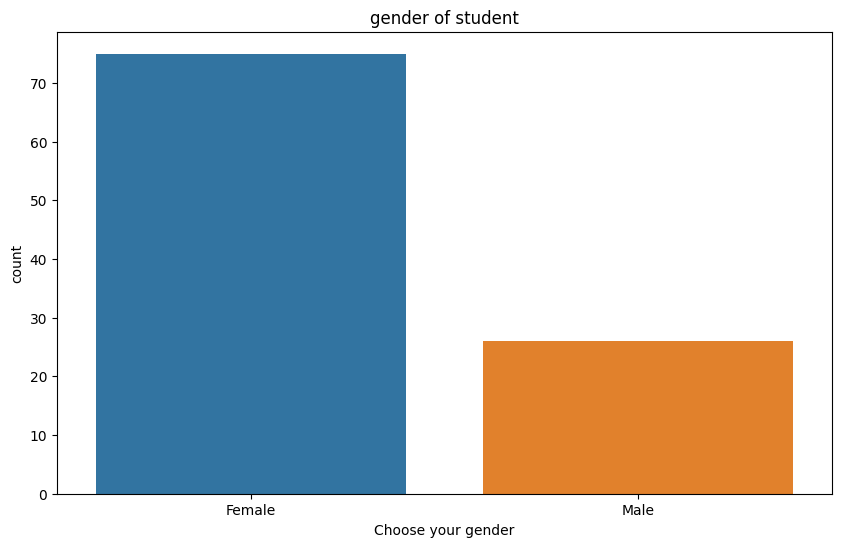

In [160]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Choose your gender')
plt.title('gender of student')
plt.show()

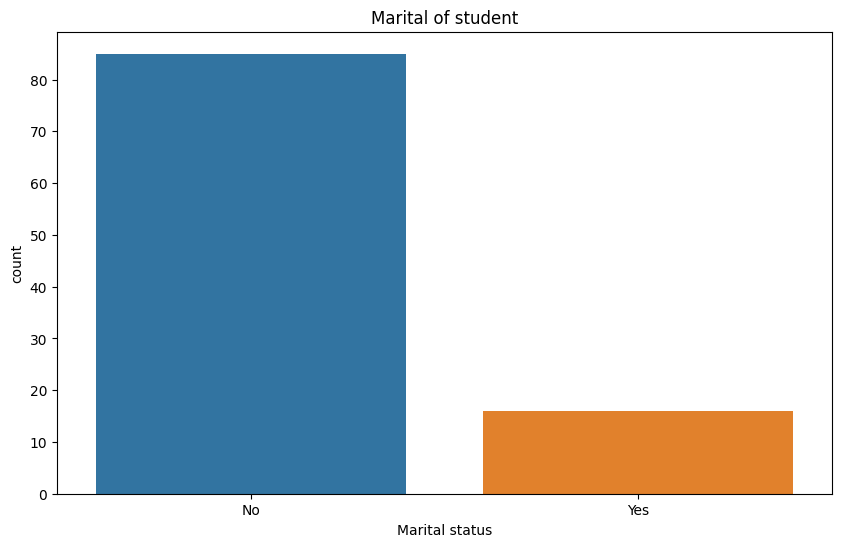

In [161]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Marital status')
plt.title('Marital of student')
plt.show()

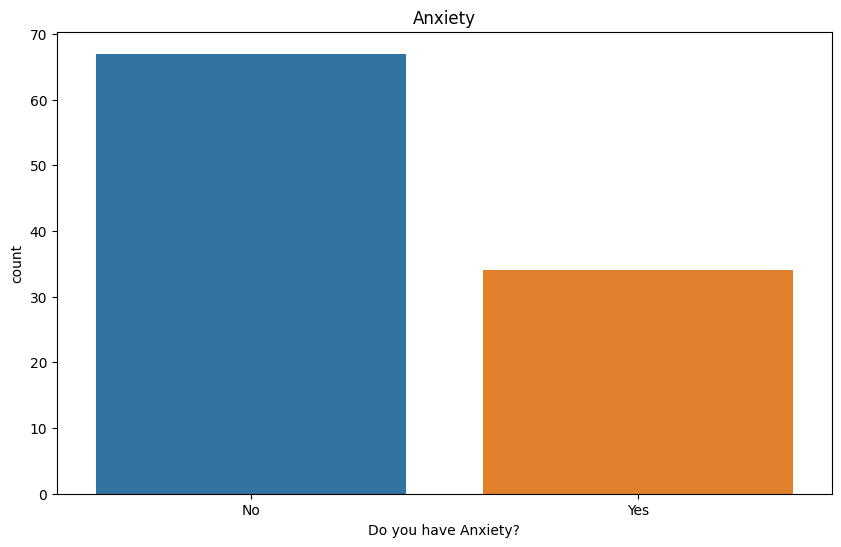

In [162]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Do you have Anxiety?')
plt.title('Anxiety')
plt.show()

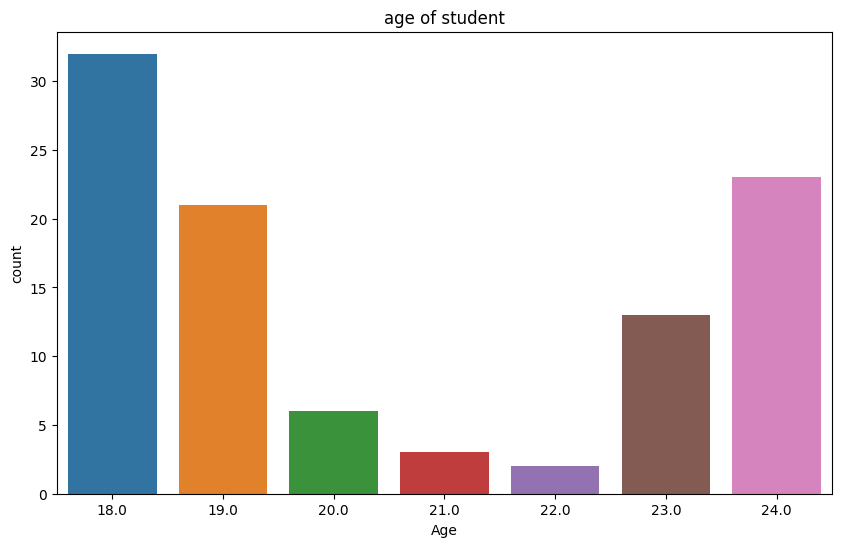

In [163]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age')
plt.title('age of student')
plt.show()

In [164]:

df['Age'] = pd.to_numeric(df['Age'], errors='coerce').fillna(0).astype(np.int64)

In [165]:
df['What is your CGPA?']=pd.to_numeric(df['What is your CGPA?'], errors='coerce').fillna(0).astype(float)
df.dtypes

Choose your gender                               object
Age                                               int64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                              float64
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

In [166]:
df['Choose your gender'].unique()

array(['Female', 'Male'], dtype=object)

In [167]:
df['What is your course?'].unique()

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

In [168]:
df['Your current year of Study'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [169]:
df['Your current year of Study'].replace('Year 1','year 1',inplace=True)
df['Your current year of Study'].replace('Year 2','year 2',inplace=True)
df['Your current year of Study'].replace('Year 3','year 3',inplace=True)
df['Your current year of Study'].unique()

array(['year 1', 'year 2', 'year 3', 'year 4'], dtype=object)

In [170]:
df['Marital status'].unique()

array(['No', 'Yes'], dtype=object)

In [171]:
df['Do you have Anxiety?'].unique()

array(['No', 'Yes'], dtype=object)

In [172]:
df['Do you have Panic attack?'].unique()

array(['Yes', 'No'], dtype=object)

In [173]:
df['Did you seek any specialist for a treatment?'].unique()

array(['No', 'Yes'], dtype=object)

In [174]:
df.isnull().sum()

Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [175]:
df = pd.get_dummies(df, columns=["Choose your gender"], prefix='Choose your gender', drop_first = True)
df = pd.get_dummies(df, columns=["Your current year of Study"], prefix='Your current year of Study', drop_first = True)
df = pd.get_dummies(df, columns=["What is your course?"], prefix='What is your course?', drop_first = True)
df = pd.get_dummies(df, columns=["What is your CGPA?"], prefix='What is your CGPA?', drop_first = True)
df = pd.get_dummies(df, columns=["Marital status"], prefix='Marital status', drop_first = True)
#df = pd.get_dummies(df, columns=["Do you have Depression?"], prefix='Do you have Depression?', drop_first = True)
df = pd.get_dummies(df, columns=["Do you have Anxiety?"], prefix='Do you have Anxiety?', drop_first = True)
df = pd.get_dummies(df, columns=["Do you have Panic attack?"], prefix='Do you have Panic attack?', drop_first = True)
df = pd.get_dummies(df, columns=["Did you seek any specialist for a treatment?"], prefix='Did you seek any specialist for a treatment?', drop_first = True)
df.head()

,Age,Do you have Depression?,Choose your gender_Male,Your current year of Study_year 2,Your current year of Study_year 3,Your current year of Study_year 4,What is your course?_Accounting,What is your course?_BCS,What is your course?_BENL,What is your course?_BIT,...,What is your course?_Radiography,What is your course?_TAASL,What is your course?_Usuluddin,What is your course?_engin,What is your course?_koe,What is your course?_psychology,Marital status_Yes,Do you have Anxiety?_Yes,Do you have Panic attack?_Yes,Did you seek any specialist for a treatment?_Yes
0,18,Yes,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,21,No,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,19,Yes,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
3,22,Yes,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,23,No,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [176]:
X = df.drop('Do you have Depression?', axis = 1)
y = df['Do you have Depression?']

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Random forest classifier

In [178]:
df_rfc=RandomForestClassifier()
df_rfc.fit(X_train,y_train)


RandomForestClassifier()

In [179]:
y_pred_rfc =df_rfc.predict(X_test)
accuracy_rfc= accuracy_score(y_test, y_pred_rfc)
accuracy_rfc

0.7619047619047619

In [180]:

classification_rep = classification_report(y_test, y_pred_rfc)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

          No       0.72      1.00      0.84        13
         Yes       1.00      0.38      0.55         8

    accuracy                           0.76        21
   macro avg       0.86      0.69      0.69        21
weighted avg       0.83      0.76      0.73        21



#KNeighborsClassifier

In [181]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)


In [182]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6190476190476191

In [183]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

          No       0.63      0.92      0.75        13
         Yes       0.50      0.12      0.20         8

    accuracy                           0.62        21
   macro avg       0.57      0.52      0.47        21
weighted avg       0.58      0.62      0.54        21



#DecisionTreeClassifier

In [184]:
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_p = dt.predict(X_test)
predictions = pd.DataFrame({'Actual Labels': y_test, 'Predicted Labels': y_p})
print(predictions)

   Actual Labels Predicted Labels
84            No               No
55            No               No
66            No              Yes
67           Yes              Yes
45            No               No
39           Yes              Yes
22            No               No
44            No               No
10            No               No
0            Yes               No
18            No               No
30            No               No
97           Yes               No
33           Yes              Yes
77            No               No
4             No               No
93           Yes               No
78            No               No
12           Yes               No
31            No              Yes
76           Yes               No


In [185]:
accuracy_dt = accuracy_score(y_test, y_p)
accuracy_dt

0.6666666666666666

In [186]:
report_dt = classification_report(y_test, y_p)
print("Classification Report:\n", report_dt)

Classification Report:
               precision    recall  f1-score   support

          No       0.69      0.85      0.76        13
         Yes       0.60      0.38      0.46         8

    accuracy                           0.67        21
   macro avg       0.64      0.61      0.61        21
weighted avg       0.65      0.67      0.65        21



#Random forest is preforming best between all three of these  Model
